In [3]:
%matplotlib inline
import numpy as np
from numpy import loadtxt
from lmfit.models import ExponentialModel, ConstantModel
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [4]:
def red(time):
    '''
    This should eliminate the issue of the weird time jump about 2/3 of way through collection also that t=0 if 0 counts
    '''
    return np.arange(0,len(time))
def hours(secs,counts):
    import numpy
    hours=numpy.arange(0,secs[len(secs)-1]//3600+1)
    binned_counts=[0]*len(hours)
    for i in range(0,len(secs)):
        index=i//3600
        binned_counts[index]+=counts[i]
    return hours,binned_counts

In [27]:
#time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_03-13-02.txt', unpack=True)
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_08-13-33.txt', unpack=True)

last_hour_index =144000
time=time[0:last_hour_index]
rate=rate[0:last_hour_index]
hour_time,binned_counts=hours(red(time),rate)
hour_time=hour_time[:-2]
binned_counts=binned_counts[:-2]

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 34
    # data points      = 38
    # variables        = 3
    chi-square         = 41.506
    reduced chi-square = 1.186
[[Variables]]
    amp:     95.3161805 +/- 35.24723 (36.98%) (init= 5)
    omega:   0.2617994 (fixed)
    shift:  -1.36885968 +/- 0.398234 (29.09%) (init= 0)
    y0:      20499.5272 +/- 26.36554 (0.13%) (init= 20506.68)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 = -0.270 



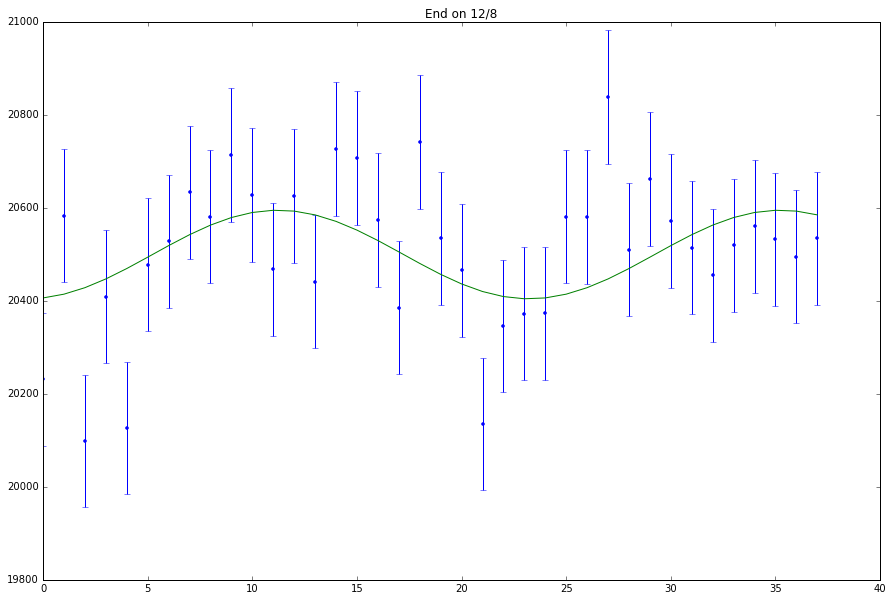

In [28]:
def sin(x, amp,omega,shift,y0):
    """ model decaying sine wave, subtract data"""
    #amp = params['amp'].value
    #shift = params['shift'].value
    #omega = params['omega'].value
    
    return amp * np.sin(x * omega + shift)+y0
from lmfit import Model
gmod = Model(sin)
params = gmod.make_params(amp=5, omega=.26,shift=0,y0=18800)
params.add('omega',value=2*np.pi/24,vary=False)
params.add('y0',value=np.average(binned_counts))
result = gmod.fit(binned_counts,params,x=hour_time,weights=1/np.sqrt(binned_counts))

print(result.fit_report())
x=hour_time
y=binned_counts
plt.figure(figsize=(15,10))
plt.errorbar(x, y,fmt='.',yerr=np.sqrt(y))
plt.title('End on 12/8')
plt.plot(x, result.best_fit, '-')
plt.show()

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 47
    # data points      = 36
    # variables        = 3
    chi-square         = 61.458
    reduced chi-square = 1.862
[[Variables]]
    amp:     1182.12680 +/- 121.8305 (10.31%) (init= 5)
    omega:   0.2617994 (fixed)
    shift:   7.40626775 +/- 0.105016 (1.42%) (init= 0)
    y0:      1.3927e+05 +/- 88.96609 (0.06%) (init= 139410.6)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.255 
    C(amp, y0)                   = -0.164 



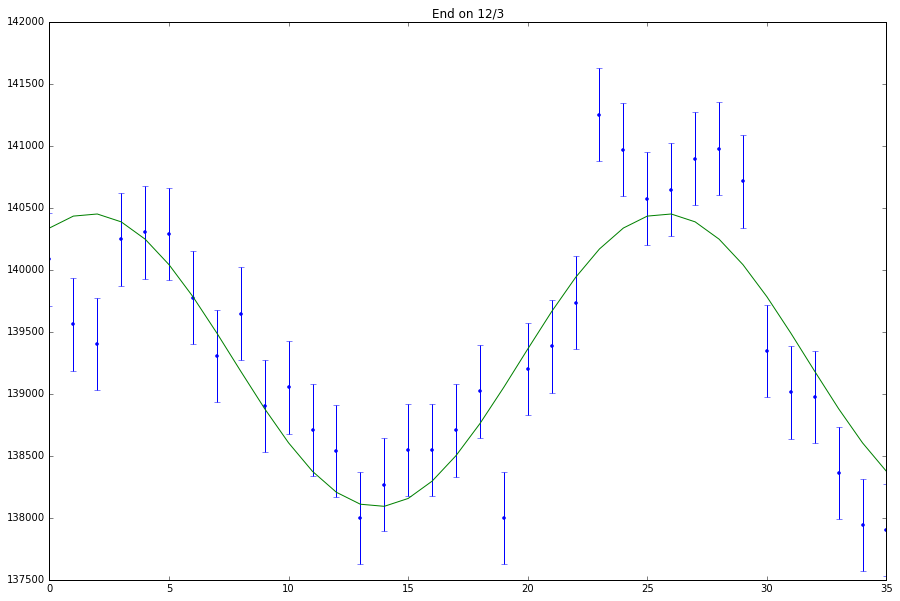

In [29]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_03-13-02.txt', unpack=True)
hour_time,binned_counts=hours(red(time),rate)
hour_time=hour_time[:-1]
binned_counts=binned_counts[:-1]
params.add('y0',value=np.average(binned_counts))
result = gmod.fit(binned_counts,params,x=hour_time,weights=1/np.sqrt(binned_counts))

print(result.fit_report())
x=hour_time
y=binned_counts
plt.figure(figsize=(15,10))
plt.errorbar(x, y,fmt='.',yerr=np.sqrt(y))
plt.title('End on 12/3')
plt.plot(x, result.best_fit, '-')
plt.show()